# Custom Training with YOLOv5

In this tutorial, we assemble a dataset and train a custom YOLOv5 model to recognize the objects in our dataset. To do so we will take the following steps:

* Gather a dataset of images and label our dataset
* Export our dataset to YOLOv5
* Train YOLOv5 to recognize the objects in our dataset
* Evaluate our YOLOv5 model's performance
* Run test inference to view our model at work



![](https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png)

# Step 1: Install Requirements

In [ ]:
import cv2
from pandas import DataFrame
from cv2 import imread, imwrite, resize
from google.colab.patches import cv2_imshow
from math import ceil
from time import time
import glob
import os

In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15637, done.
remote: Counting objects: 100% (244/244), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 15637 (delta 123), reused 171 (delta 100), pack-reused 15393
Receiving objects: 100% (15637/15637), 14.58 MiB | 17.45 MiB/s, done.
Resolving deltas: 100% (10652/10652), done.
/content/yolov5/yolov5
Setup complete. Using torch 2.0.0+cu118 (Tesla T4)


In [ ]:
#from roboflow import Roboflow
#rf = Roboflow(model_format="yolov5", notebook="ultralytics")

RuntimeError: ignored

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
#after following the link above, recieve python code with these fields filled in
#from roboflow import Roboflow
#rf = Roboflow(api_key="YOUR API KEY HERE")
#project = rf.workspace().project("YOUR PROJECT")
#dataset = project.version("YOUR VERSION").download("yolov5")

#from roboflow import Roboflow
#rf = Roboflow(api_key="qVM77wR2gC1EyK1aPShF")
#project = rf.workspace("new-workspace-l7ddx").project("digital-crispr")
#dataset = project.version(1).download("yolov5")


#from roboflow import Roboflow
#rf = Roboflow(api_key="qVM77wR2gC1EyK1aPShF")
#project = rf.workspace("new-workspace-l7ddx").project("digital-crispr")
#dataset = project.version(2).download("yolov5")


#from roboflow import Roboflow
#rf = Roboflow(api_key="qVM77wR2gC1EyK1aPShF")
#project = rf.workspace("new-workspace-l7ddx").project("digital-crispr")
#dataset = project.version(3).download("yolov5")

#from roboflow import Roboflow
#rf = Roboflow(api_key="qVM77wR2gC1EyK1aPShF")
#project = rf.workspace("new-workspace-l7ddx").project("digital-crispr")
#dataset = project.version(4).download("yolov5")

from roboflow import Roboflow
rf = Roboflow(api_key="qVM77wR2gC1EyK1aPShF")
project = rf.workspace("new-workspace-l7ddx").project("digital-crispr")
dataset = project.version(5).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to /content/datasets/digital-CRISPR-5 in yolov5pytorch:: 100%|██████████| 686/686 [00:00<00:00, 2057.36it/s]


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [ ]:
!python train.py --img 416 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --cache #--weights /content/drive/MyDrive/AI4DigitalCRISPR/best150epochondatasetv4_mAP_99_55.pt 

train: weights=yolov5s.pt, cfg=, data=/content/datasets/digital-CRISPR-5/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hs

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-05-02 22:26:26.129409: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 22:26:26.916308: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-02 22:26:28.836235: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-02 22:26:28.877937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had n

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [ ]:
!python detect.py --weights runs/train/exp2/weights/best.pt --img 416 --conf 0.1 --source {dataset.location}/test/images --hide-labels

detect: weights=['runs/train/exp2/weights/best.pt'], source=/content/datasets/digital-CRISPR-5/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/20 /content/datasets/digital-CRISPR-5/test/images/2003D6-1_JPG.rf.74abbeffead6f5e52af96367a6eb072d.jpg: 416x416 10 Positive-wells, 7.4ms
image 2/20 /content/datasets/digital-CRISPR-5/test/images/2010B8-1_JPG.rf.e7aac15c17b67f0ccc209f6ccd5f0718.jpg: 416x416 (no detections), 7.5ms
image 3/20 /content/datasets/dig

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-05-02 22:28:03.004220: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-02 22:28:04.204305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-02 22:28:05.996213: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-02 22:28:06.027987: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had n

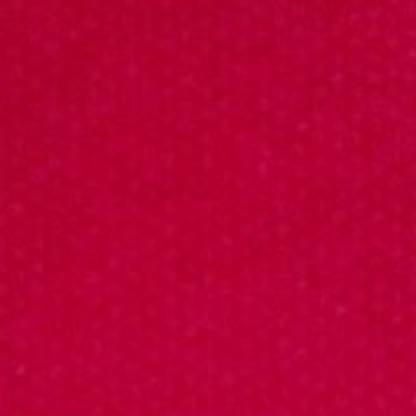

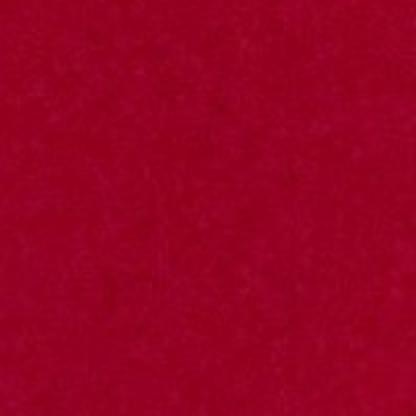

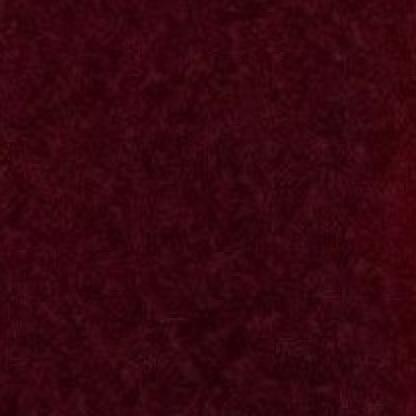

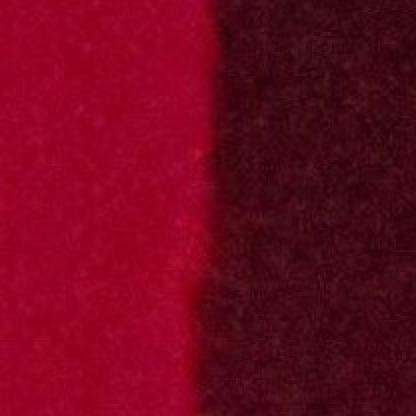

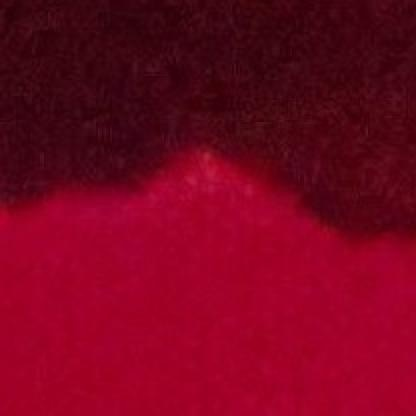

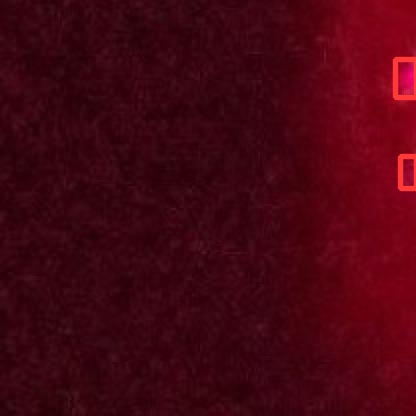

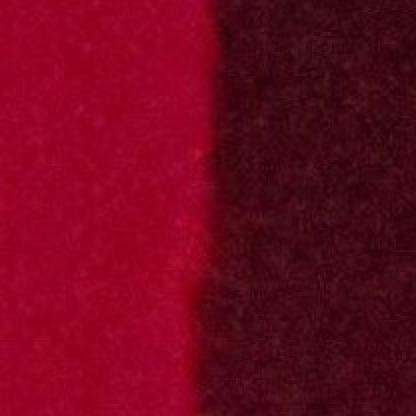

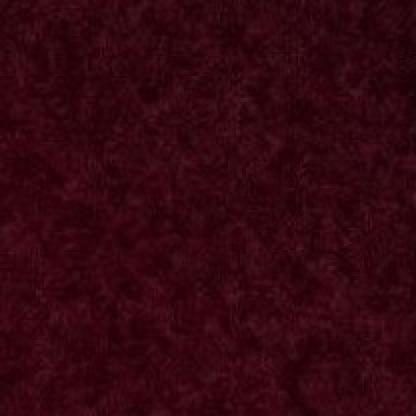

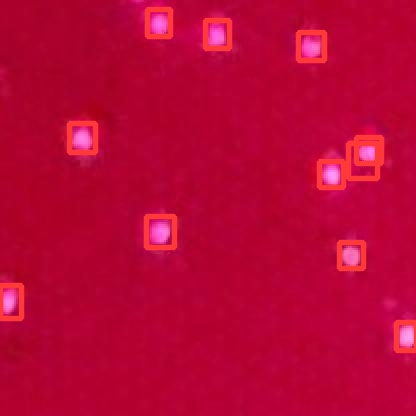

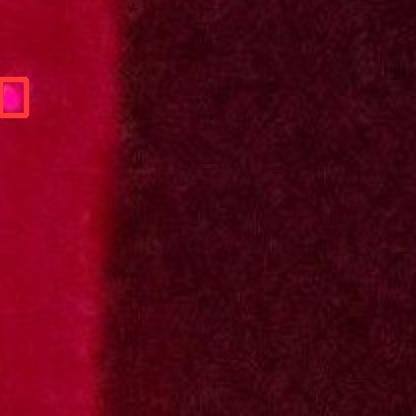

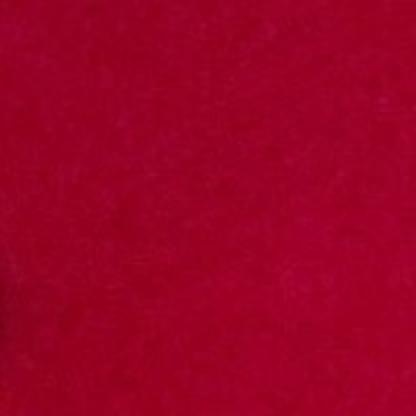

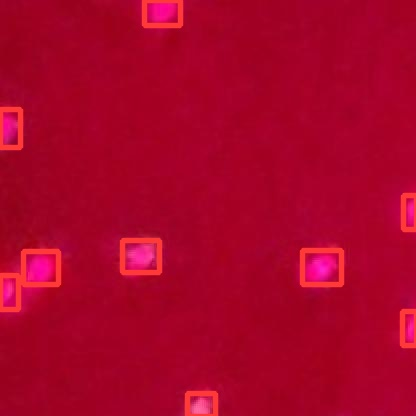

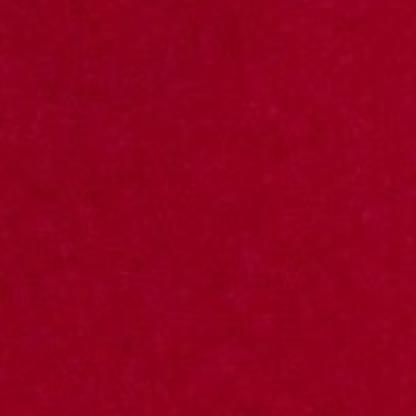

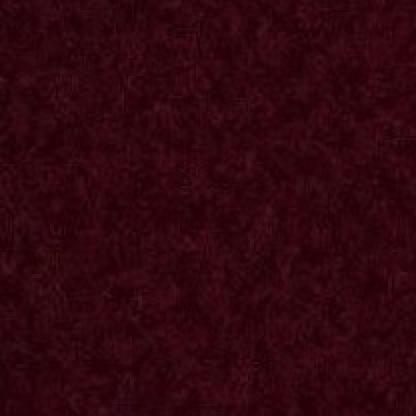

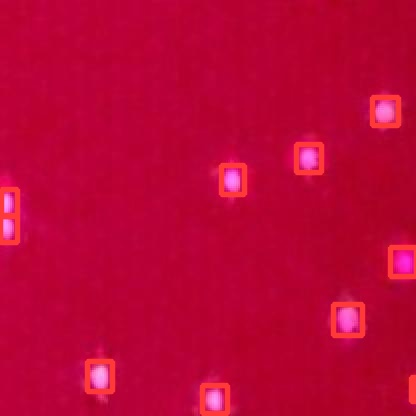

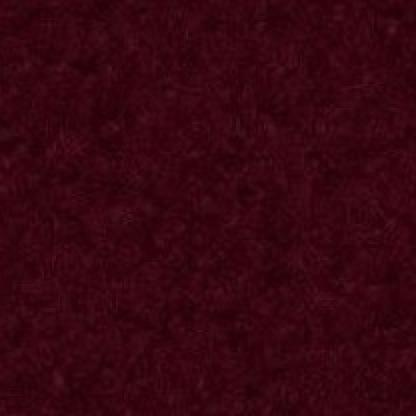

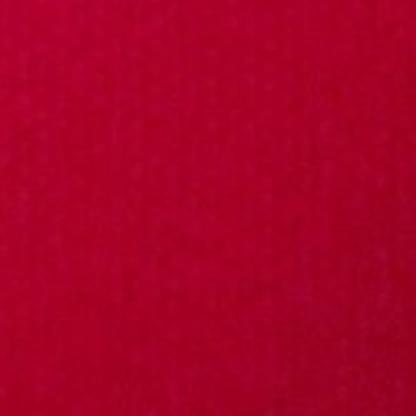

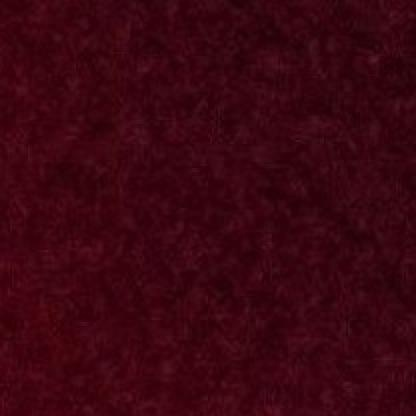

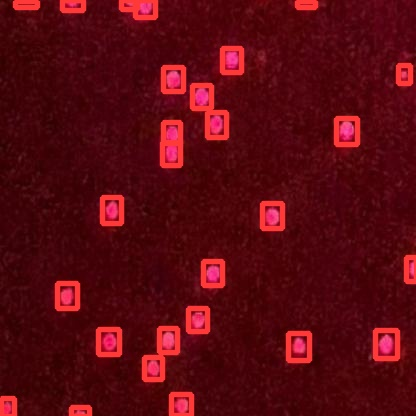

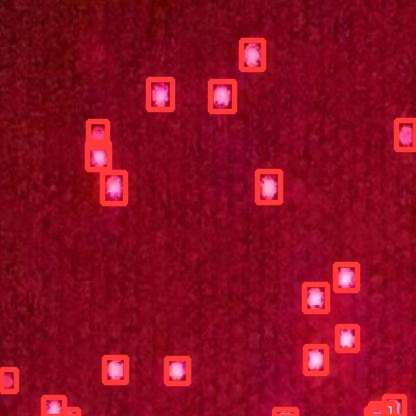

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

# Deploy model

In [ ]:
#reference from https://binginagesh.medium.com/small-object-detection-an-image-tiling-based-approach-bce572d890ca
def datapipeline(path, im_name):
  '''
  This function takes image path 
  and image names as arguments
  and divides the images into 
  blocks (tiles) and detects 
  objects in individual
  blocks (tiles). Finally, the 
  blocks are stitched 
  together and detected images
  are displayed.
  '''
  
  colors = [
      (0,0,255),
  ]

  obj_names = [
             "positive"
  ]
  
  # read image and make tiles each of dimensions size x size
  ext = im_name.split(".")[-1]
  im = imread(path + im_name)
  size = 416 #tile image size 208 x 208
  h, w, _ = im.shape
  h_new = ceil(h/size) * size
  w_new = ceil(w/size) * size
  scale_h = h_new/h
  scale_w = w_new/w
  resized_im = resize(im, (w_new, h_new), cv2.INTER_LINEAR)

  !rm -rf "/content/tiled_images/"
  !mkdir "/content/tiled_images/"
  tiled_images_path = "/content/tiled_images/"
  
  tiled_ims_list = []

  for i in range(h_new//size):
    for j in range(w_new//size):
      tiled = resized_im[i*size : (i+1)*size, j*size : (j+1)*size, :]
      tiled_im_name = tiled_images_path + im_name.split(".")[0] + "_" + str(i) + "_" + str(j) + "." + ext
      tiled_ims_list.append(tiled_im_name)
      df = DataFrame(tiled_ims_list)
      # saving the path of tiled images so as to feed it to yolo model
      df.to_csv("/content/tiled_images.txt", index = False, header = False)
      # saving tiled image
      imwrite(tiled_im_name, tiled)

  # detect objects on individual tiles and store detected objects in json format
  start = time()
  !python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --conf-thres 0.1 --save-txt --save-conf --source /content/tiled_images --hide-labels
  #!python detect.py --weights /content/drive/MyDrive/AI4DigitalPCR/20210824_YOLOV5_1000epoch/best.pt --img 200 --conf 0.1 --conf-thres 0.1 --save-txt --save-conf --source /content/tiled_images
  end = time()



# Infer on test image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datapipeline("/content/drive/MyDrive/AI4DigitalCRISPR/","MedConc3200iso1-15s.1-cropped.jpg")

detect: weights=['runs/train/exp/weights/best.pt'], source=/content/tiled_images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=True, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-70-g589edc7 Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/25 /content/tiled_images/MedConc3200iso1-15s_0_0.jpg: 416x416 (no detections), 8.3ms
image 2/25 /content/tiled_images/MedConc3200iso1-15s_0_1.jpg: 416x416 (no detections), 8.1ms
image 3/25 /content/tiled_images/MedConc3200iso1-15s_0_2.jpg: 416x416 (no detections), 8.6ms
image 4/25 /content/tiled_images/MedConc3200iso1-15s_0_3.jpg: 416x416 

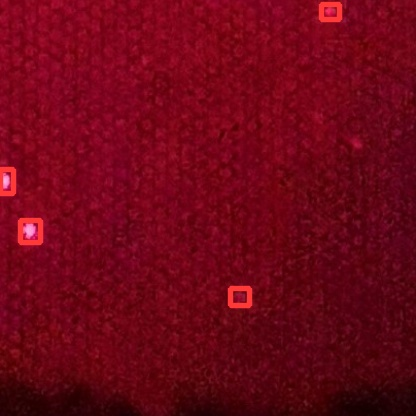

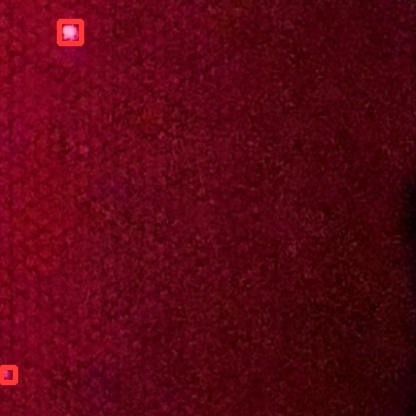

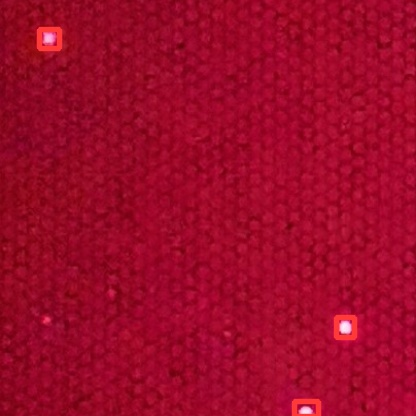

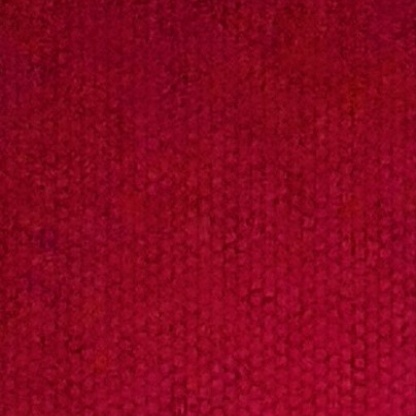

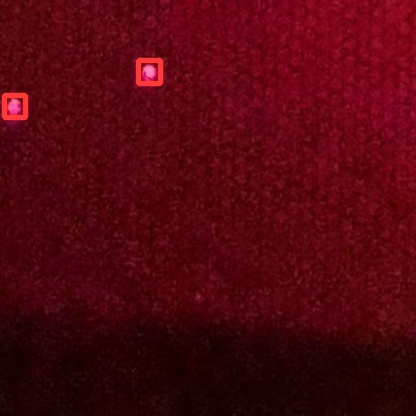

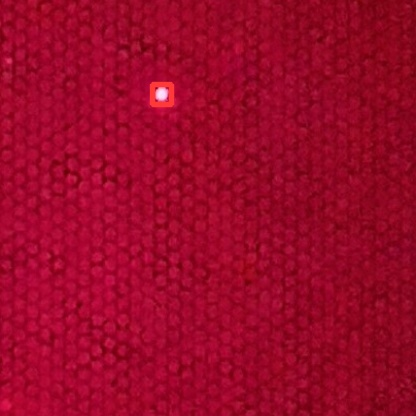

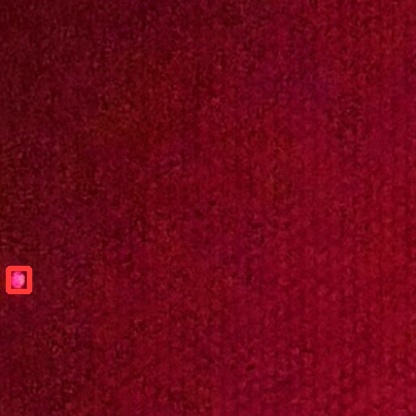

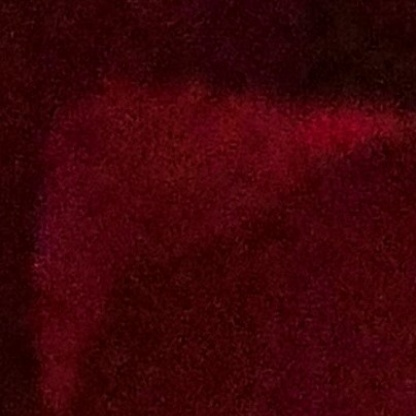

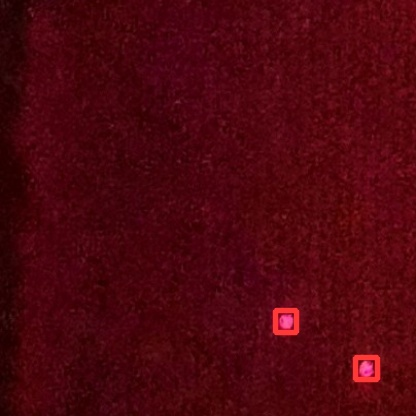

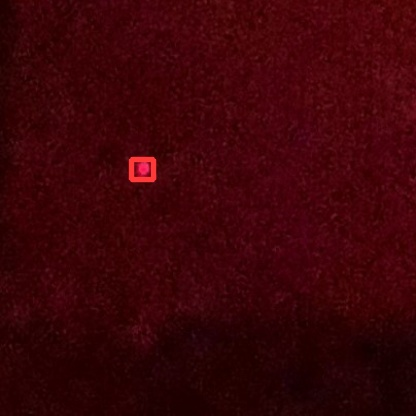

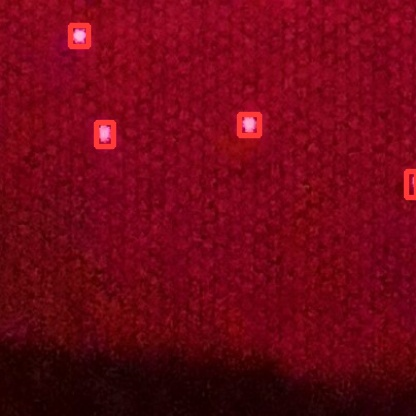

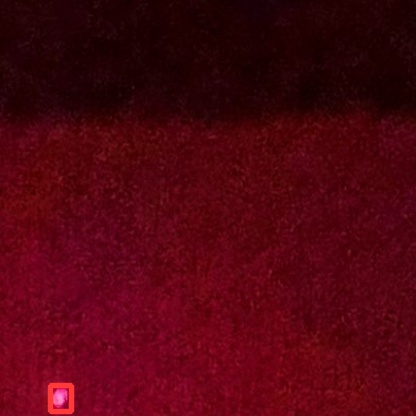

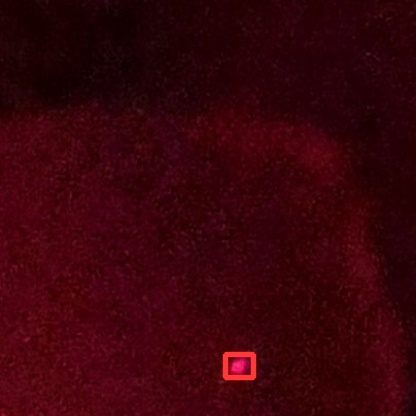

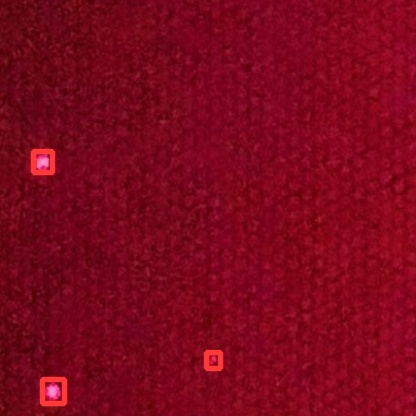

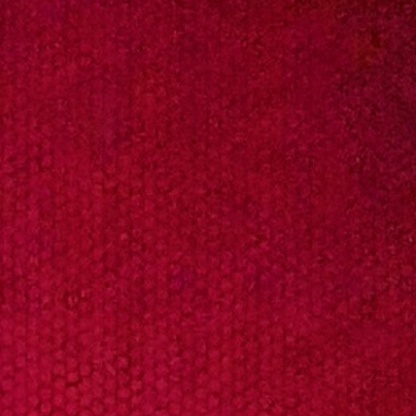

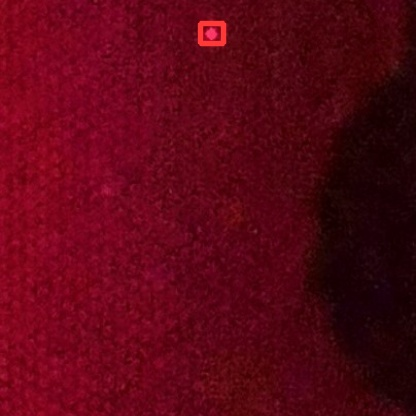

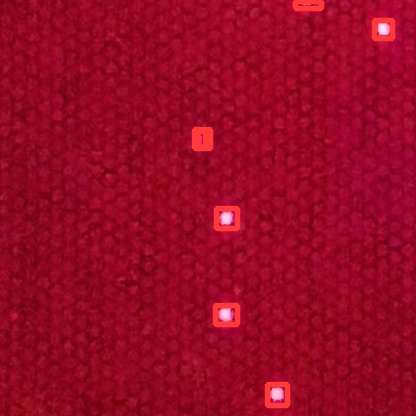

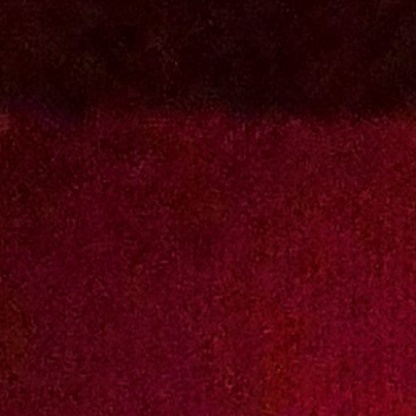

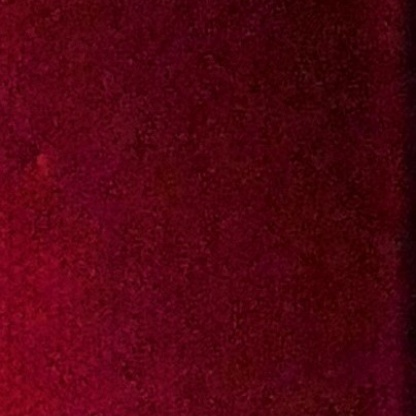

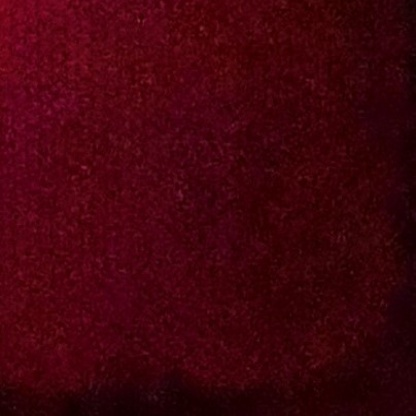

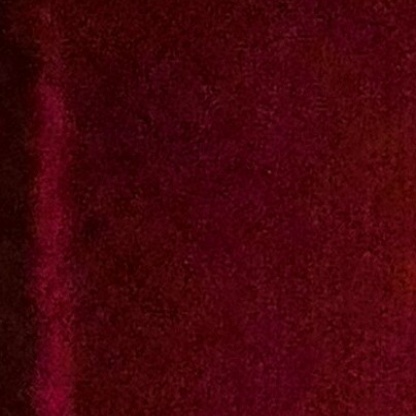

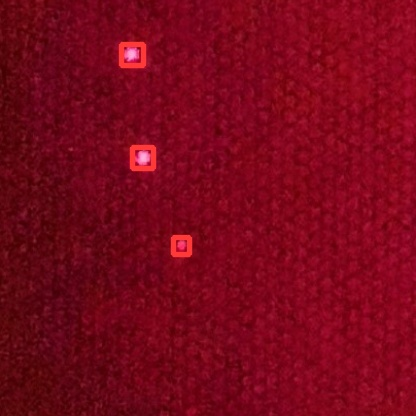

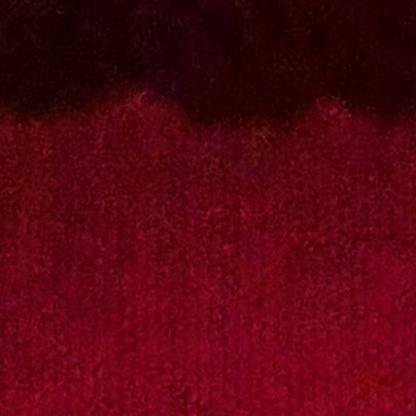

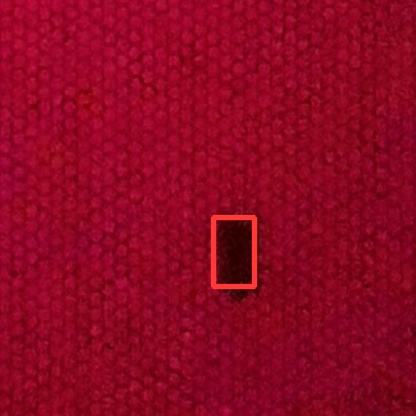

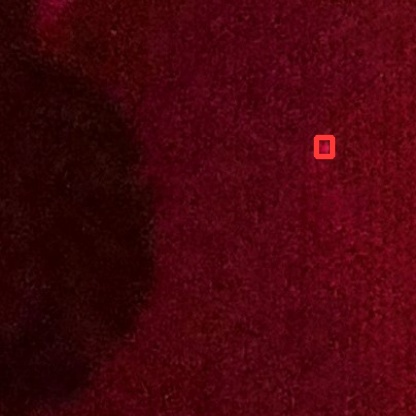

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob("/content/yolov5/runs/detect/exp2/*.jpg"): #assuming JPG
    display(Image(filename=imageName))
    #print("\n")


# Stitch tiles with bounding boxes together

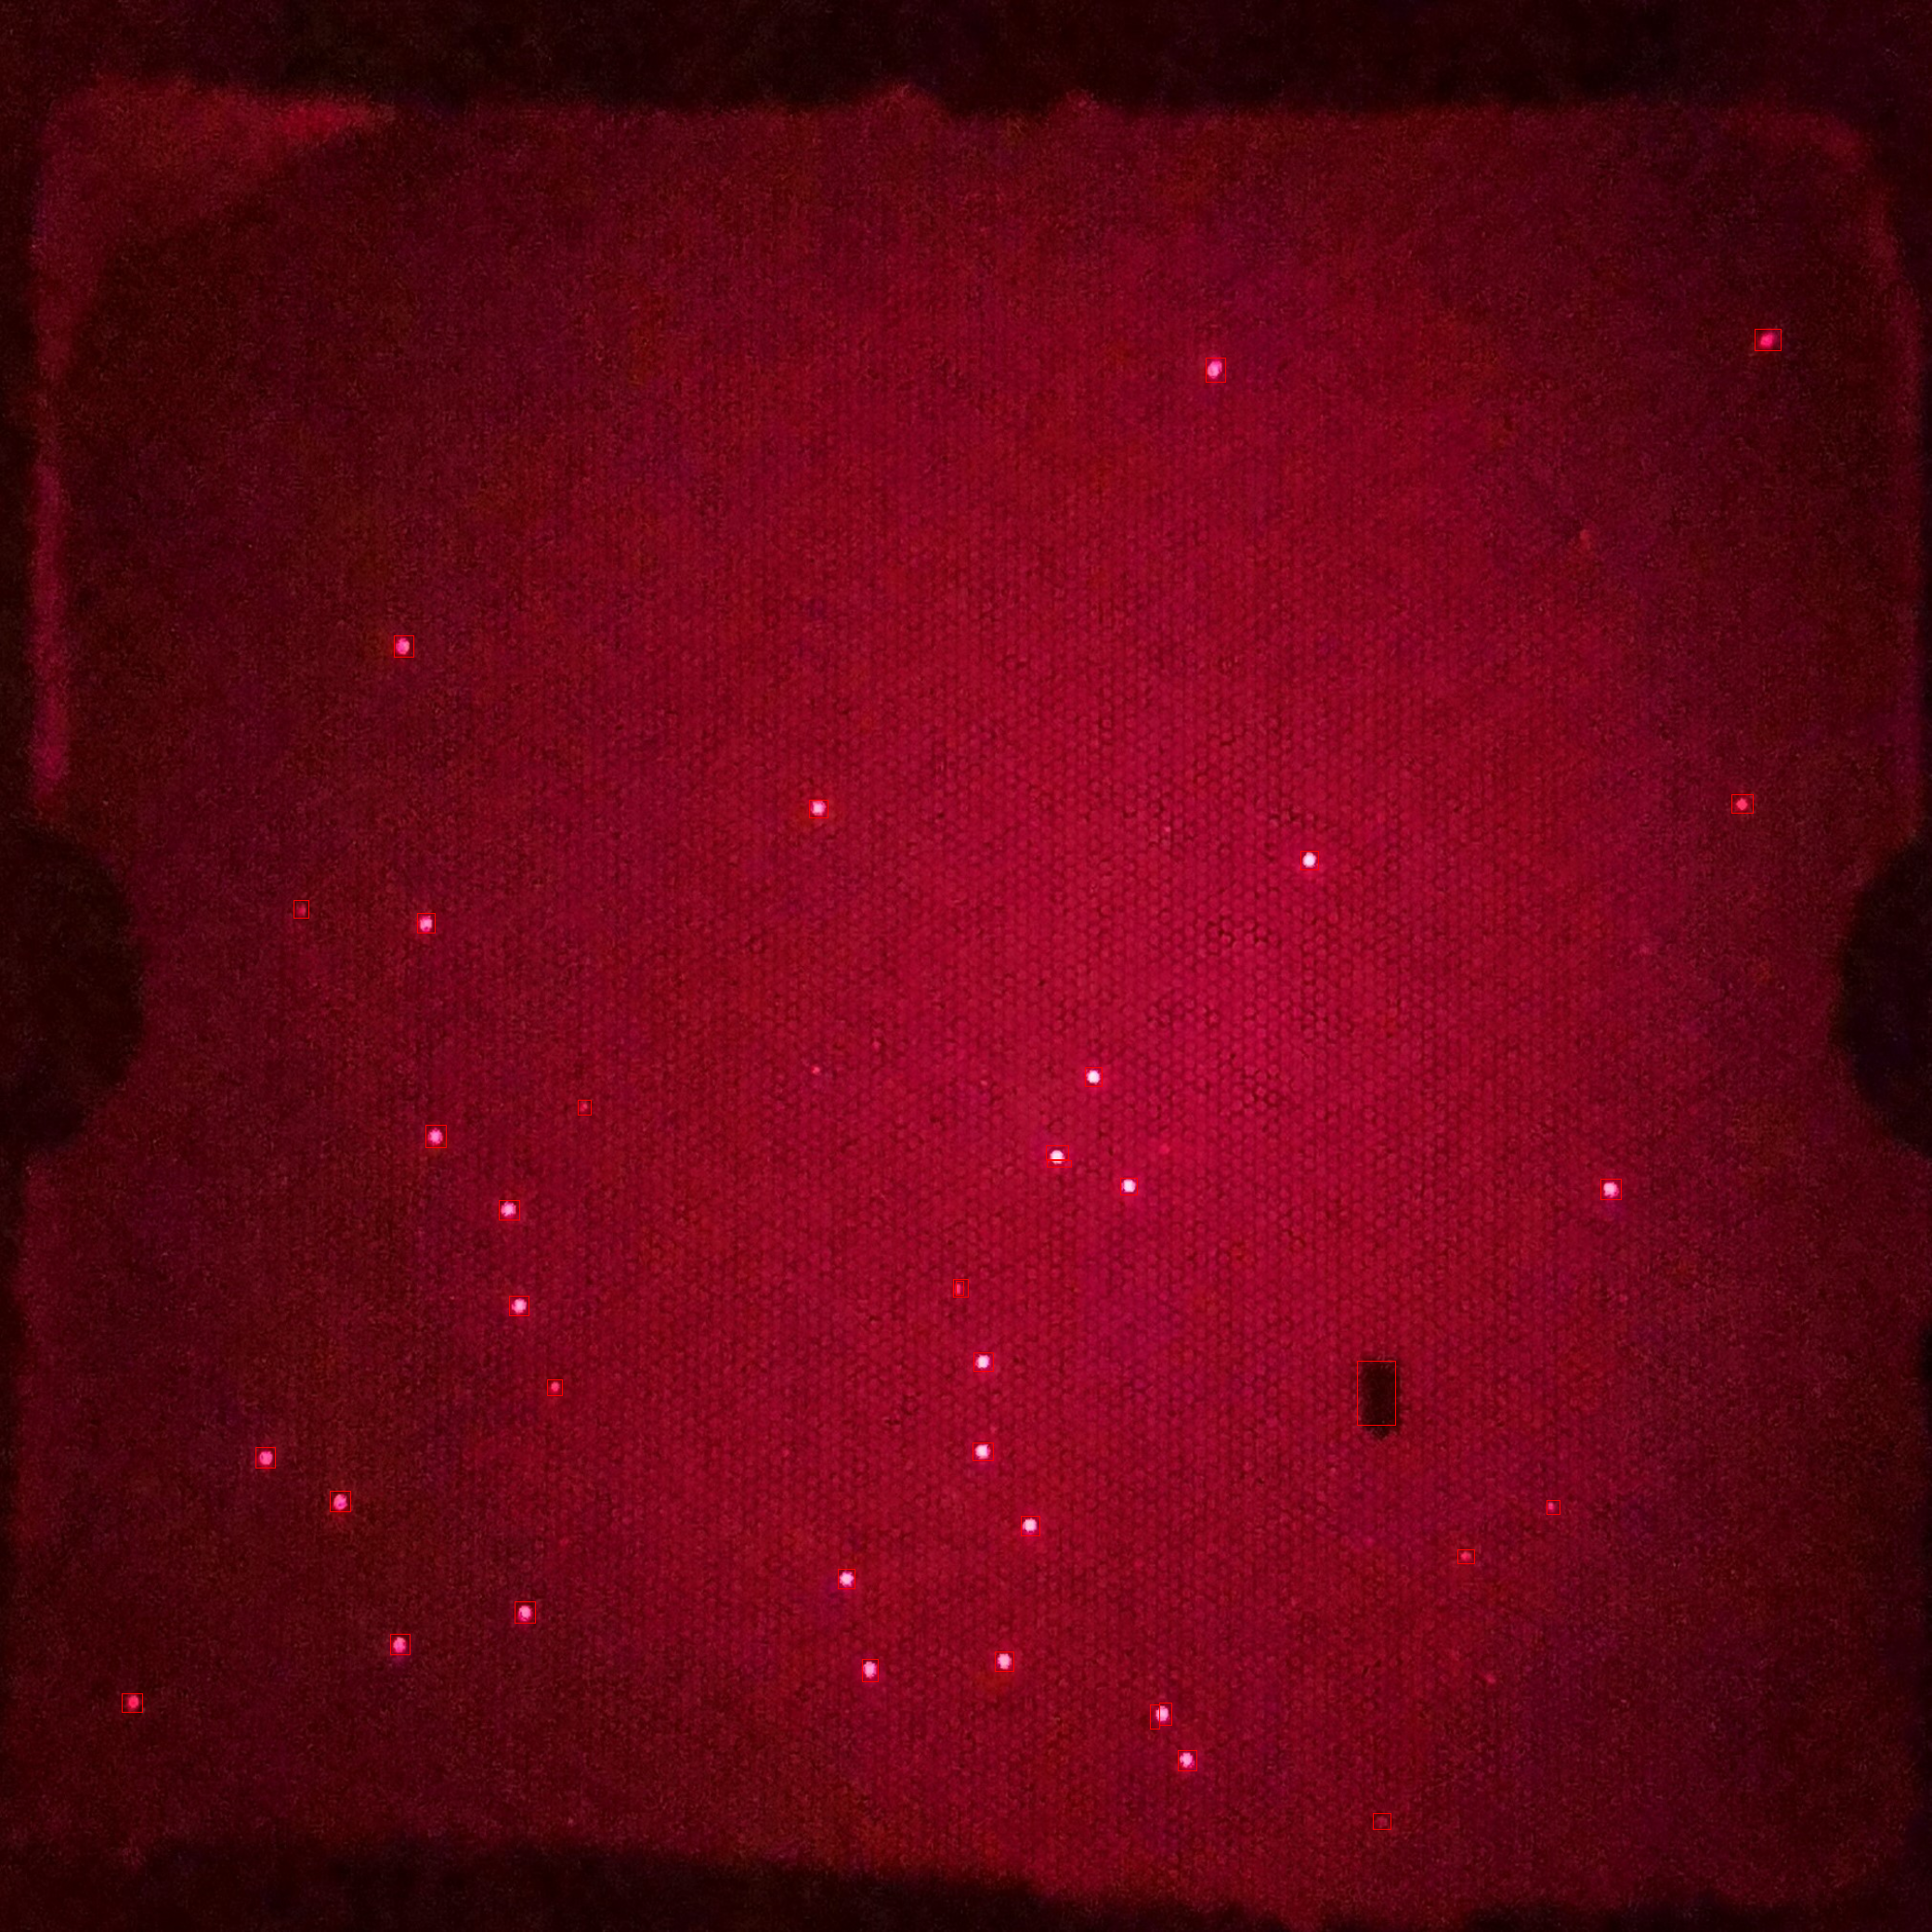

In [ ]:
im_location = "/content/drive/MyDrive/AI4DigitalCRISPR/MedConc3200iso1-15s.1-cropped.jpg"
ext = im_location.split(".")[-1]
im = imread(im_location)
size = 416 #tile image size 200 x 200
h, w, _ = im.shape
h_new = ceil(h/size) * size
w_new = ceil(w/size) * size
scale_h = h_new/h
scale_w = w_new/w
resized_im = resize(im, (w_new, h_new), cv2.INTER_LINEAR)
annotations_list = []
for file_path in glob.glob("/content/yolov5/runs/detect/exp2/labels/*.txt"):
  file_name = os.path.basename(file_path).split(".")[0]
  im_index_i = file_name.split("_")[1] #i is index of row -> y
  im_index_j = file_name.split("_")[2] #j is index of col -> x
  with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
      cls, x, y, w, h, conf = line.split() # x and y are coordinates of the center of the object
      x_abs = int(im_index_j)*size + float(x)*size  # convert to coordinate in original image
      y_abs = int(im_index_i)*size + float(y)*size  # convert to coordinate in original image
      start_point = (round(x_abs - float(w)*size/2), round(y_abs - float(h)*size/2))
      end_point = (round(x_abs + float(w)*size/2), round(y_abs + float(h)*size/2))
      annotations_list.append([cls, x_abs, y_abs, w, h, conf])  # "class", "x", "y", "w", "h", "obj_name", "confidence"
      if cls == '0' :
        resized_im = cv2.rectangle(resized_im, start_point, end_point,(0,0,255),1)
      if cls == '1':
        resized_im = cv2.rectangle(resized_im, start_point, end_point,(0,255,0),1)
cv2_imshow(resized_im)
#save annotation list 
df = DataFrame(annotations_list)
annotation_path = im_location.replace("." + ext,".txt")
# saving the location of detected objects
df.to_csv(annotation_path, sep = " ", index = False, header = False)

# This is how Bingi stitched titles
https://binginagesh.medium.com/small-object-detection-an-image-tiling-based-approach-bce572d890ca

In [ ]:
# read objects location from json and store in .txt files
  f = open("/content/result.json", )
  result = load(f)
  f.close()
  for res in result:
    if len(res["objects"]) > 0:
      annot_path = res["filename"].replace("." + ext, ".txt")
      lines = []
      for obj in res["objects"]:
        coords = obj["relative_coordinates"]
        lines.append([obj["class_id"], coords["center_x"], coords["center_y"], coords["width"], coords["height"], obj["name"], obj["confidence"]])
      
      df = DataFrame(lines)
      # saving the location of detected objects
      df.to_csv(annot_path, sep = " ", index = False, header = False)

  # combine tiled images
  annotations_list = []
  col_list = []
  for i in range(ceil(h/size)):
      row_list = []
      for j in range(ceil(w/size)):
          tiled_image_name = tiled_images_path + im_name.split(".")[0] + "_" + str(i) + "_" + str(j) + "." + ext
          row_list.append(imread(tiled_image_name))
          annot_path = tiled_image_name.replace("." + ext, ".txt")
          
          if os.path.exists(annot_path): 
            annotations = read_csv(annot_path, sep = " ", names = ["class", "xc", "yc", "yolo_w", "yolo_h", "obj_name", "confidence"])
            
            # converting locations from yolo to pascal VOC format
            annotations["w"] = annotations["yolo_w"]*size
            annotations["h"] = annotations["yolo_h"]*size
            annotations["x"] = annotations["xc"]*size - annotations["w"]/2 + j*size
            annotations["y"] = annotations["yc"]*size - annotations["h"]/2 + i*size
            
            # scaling locations to original image
            annotations["w"] = round_(annotations["w"]/scale_w)
            annotations["h"] = round_(annotations["h"]/scale_h)
            annotations["x"] = round_(annotations["x"]/scale_w)
            annotations["y"] = round_(annotations["y"]/scale_h)
      
            annotations = annotations[["class", "x", "y", "w", "h", "obj_name", "confidence"]]
            annotations_list.append(annotations)
          
      # Reference: https://www.geeksforgeeks.org/concatenate-images-using-opencv-in-python/
      col_list.append(hconcat(row_list))

  scaled_image = vconcat(col_list)
  reconstructed_image = resize(scaled_image, (w, h), interpolation = INTER_AREA)
  sleep(5)
  if len(annotations_list) > 0:
    df = concat(annotations_list, axis = 0)
    for index, row in df.iterrows():
      print(row["obj_name"])
      rectangle(reconstructed_image, (int(row["x"]), int(row["y"])), (int(row["x"]+row["w"]) , int(row["y"]+row["h"])), colors[obj_names.index(row["obj_name"])], 2)
      putText(reconstructed_image, row["obj_name"] + " "  + str(round(row["confidence"], 2)), (int(row["x"])-4, int(row["y"])-4), FONT_HERSHEY_SIMPLEX, 1, colors[obj_names.index(row["obj_name"])], 1, LINE_AA)
  else:
    print("No object detected")
  cv2_imshow(reconstructed_image)

# Conclusion and Next Steps

Congratulations! You've trained a custom YOLOv5 model to recognize your custom objects.

To improve you model's performance, we recommend first interating on your datasets coverage and quality. See this guide for [model performance improvement](https://github.com/ultralytics/yolov5/wiki/Tips-for-Best-Training-Results).

To deploy your model to an application, see this guide on [exporting your model to deployment destinations](https://github.com/ultralytics/yolov5/issues/251).

Once your model is in production, you will want to continually iterate and improve on your dataset and model via [active learning](https://blog.roboflow.com/what-is-active-learning/).

In [ ]:
#export your model's weights for future use
from google.colab import files
files.download('./runs/train/exp/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>